#### 简单线性回归

简单线性回归(单变量univariate)的目标是建立单个特征(explanatory variable, $x$)与联系值目标(response variable, $y$)之间的线性关系。具有一个解释变量的线性模型方程定义如下：

$$y = w_{1}x+ b$$

其中，$w_{1}$ 是权重(weight)，$b$ 是偏置单元(bias unit)。前者为解释变量的权重，后者为y轴截距(intercept)。因此，线性回归可以理解为通过训练样本寻找最佳拟合直线，如下图：



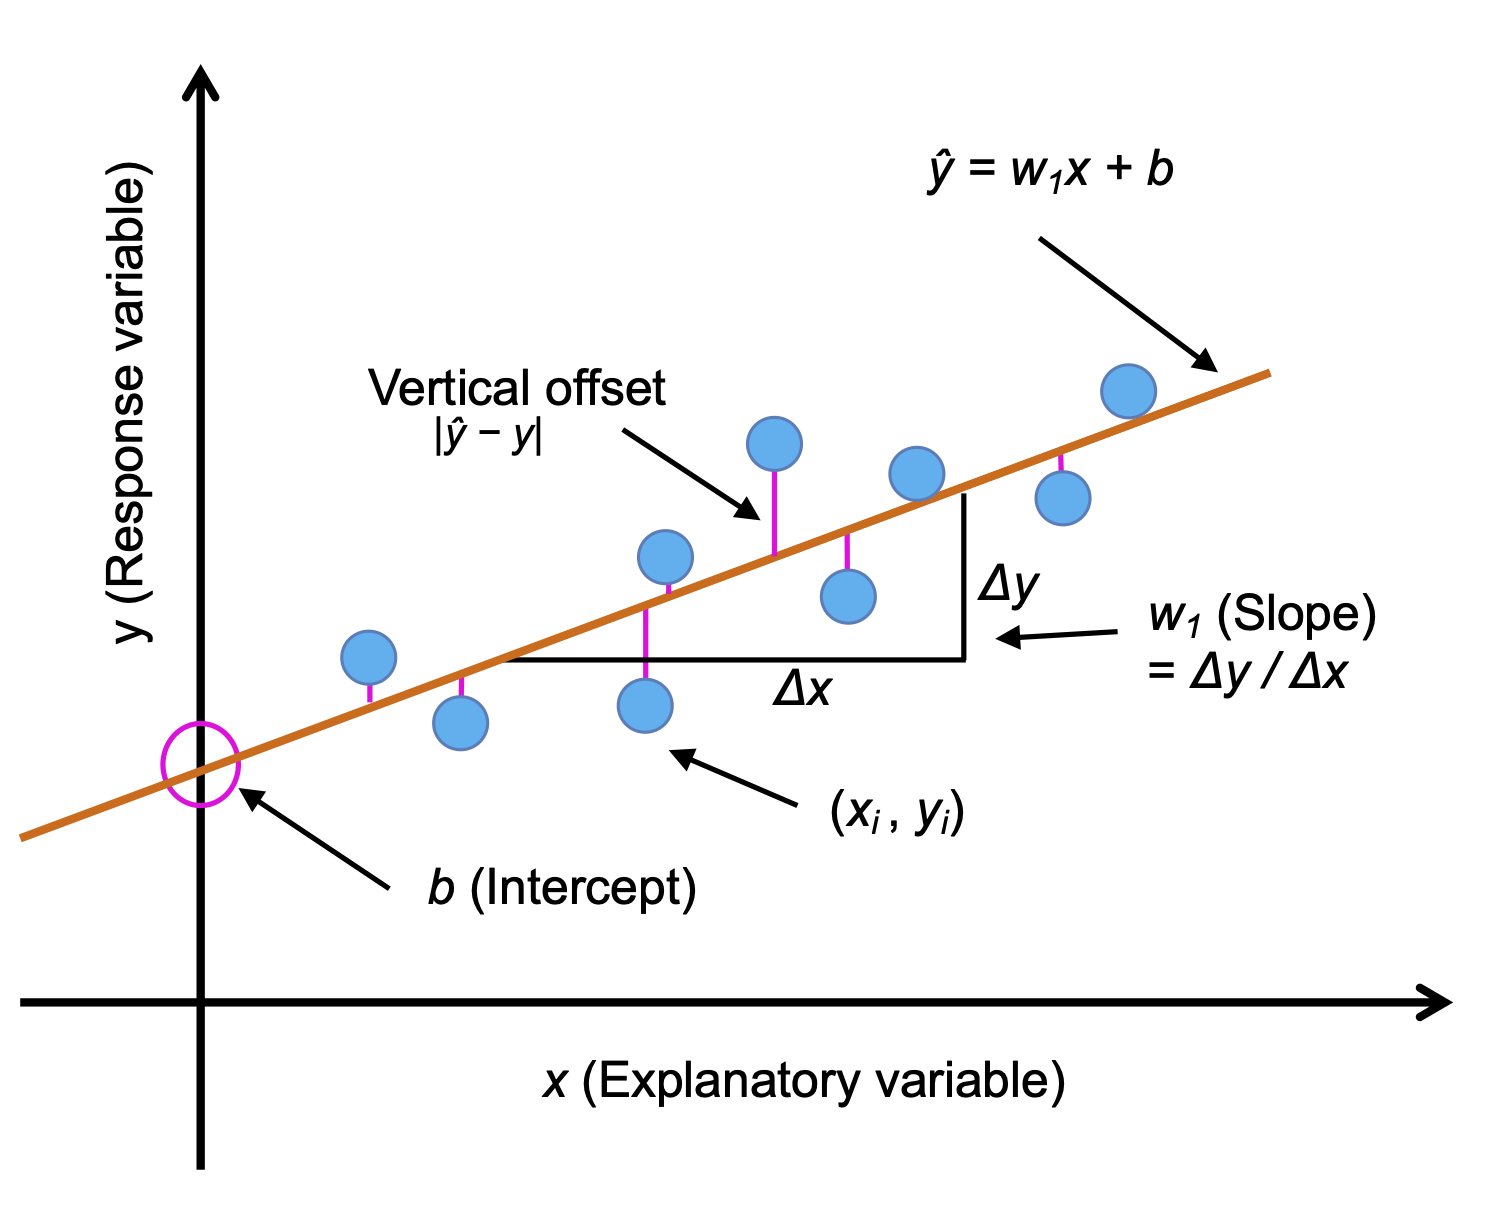

In [1]:
from IPython.display import Image

Image(filename='../Python-MachineLearning/Attached_images/Chapter9/figures/09_01.png', 
      width=450)

在上图中，最佳拟合直线也被称为回归线(regression line)， 从回归线到训练样本的垂直线是所谓的偏移量(offsets)或者残差(residuals), 即我们预测结果的误差。

#### 多元线性回归

将单变量推广到多变量的情况，可以得到如下公式：

$$y = w_1x_1 + ... + w_mx_m + b = \sum_{i=1}^mw_ix_i + b = w^T\boldsymbol{x} + b$$

下图展示了具有两个特征的多元线性回归模型具有的二维拟合超平面(fitted hyperplane):

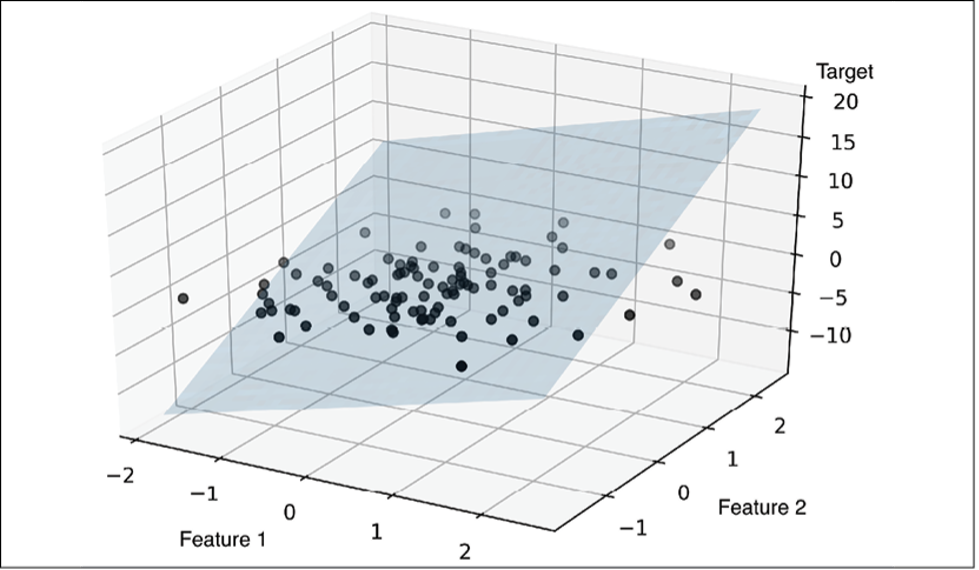

In [2]:
Image(filename='../Python-MachineLearning/Attached_images/Chapter9/figures/09_01_2.png', 
      width=450)

#### 探索Ames Housing dataset

- `'Overall Qual'`: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- `'Overall Cond'`: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
- `'Gr Liv Area'`: Above grade (ground) living area square feet
- `'Central Air'`: Central air conditioning

       N	No
       Y	Yes

- `'Total Bsmt SF'`: Total square feet of basement area
- `'SalePrice'`: Sale price $$

In [3]:
# 数据链接.   https://jse.amstat.org/v19n3/decock/AmesHousing.txt
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', 
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
# df.to_csv('../Python-MachineLearning/Datasets/Ames_house/house.csv', index=None)

In [5]:
df.shape

(2930, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   object 
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 137.5+ KB


In [7]:
# 从上面df.info()结果中可以看出，Central Air    2930 non-null   object ， 因此要转换为数值型.
df['Central Air'] = df['Central Air'].map({'N':0, 'Y':1})

In [8]:
# 缺失值统计.
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [9]:
# 移除缺失值.
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

##### 可视化重要的特征

In [10]:
# %pip install -i https://mirrors.ustc.edu.cn/simple mlxtend

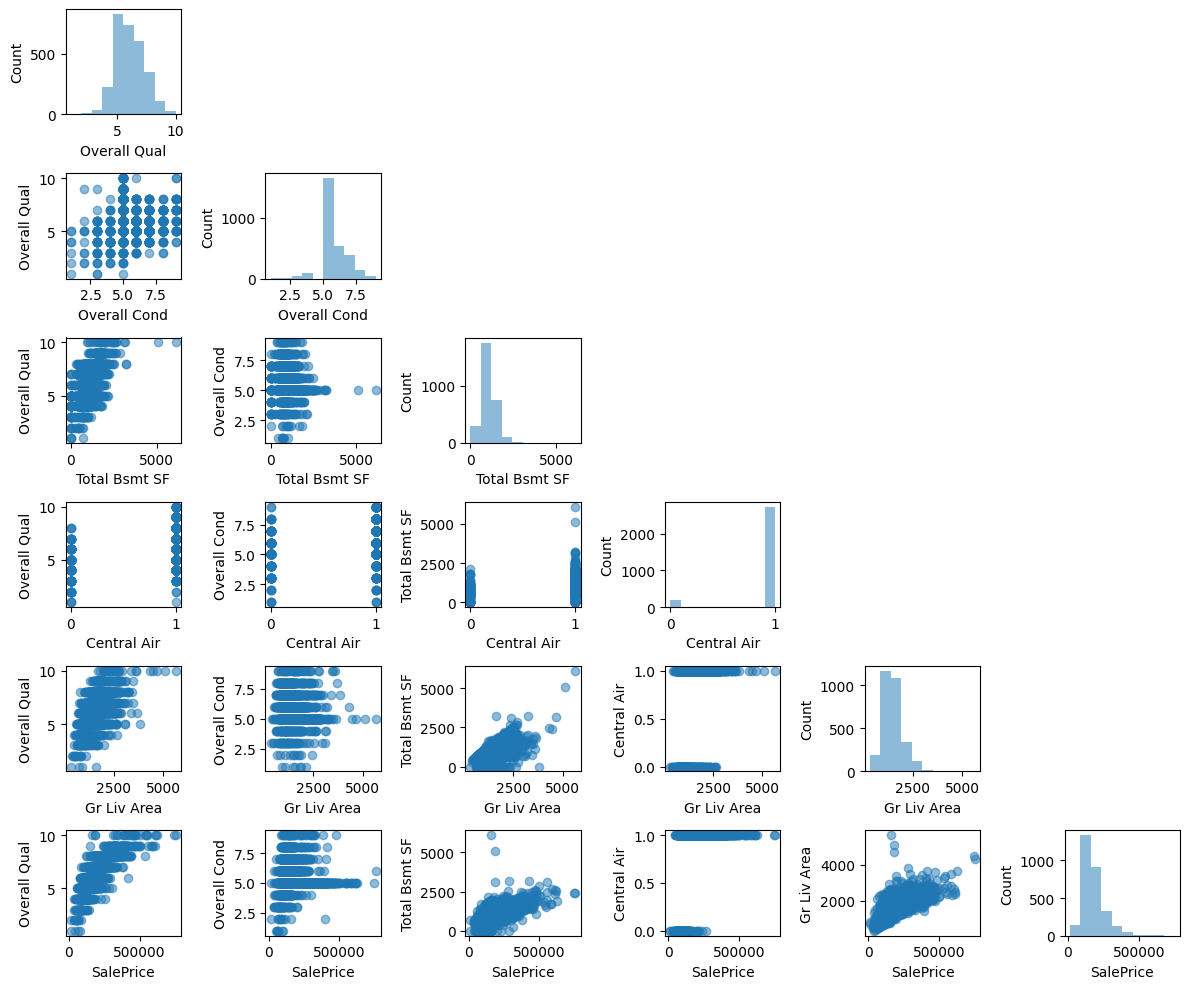

In [11]:
# Exploratory data analysis(EDA). 创建一个散点图矩阵.
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

scatterplotmatrix(df.values, figsize=(12, 10), 
                  names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

##### 相关性分析

可以将相关性矩阵(correlation matrix)解释为协方差矩阵(covariance matrix)的重缩放版本.`事实上，特征标准化处理之后，相关性矩阵与协方差矩阵相同`.

相关性矩阵是一个方阵，包含皮尔孙积矩相关系数(Pearson product-moment corralation coefficient)(通常缩写为Pearson's r), 用于度量特征对之间的线性相关性。 其中，相关系数的取值范围是$[-1, 1]$。 如果，两个特征完全正相关，则$r=1$, $r=0$则不线性相关，$r=-1$,则完全负相关. 皮尔森相关系数计算过程为： 两个特征$x, y$之间的协方差除以其标准差，如下：

$$r=\frac{\sum_{i=1}^{n}\bigl[(x^{(i)}-\mu_{x})\bigl(y^{(i)}-\mu_{y}\bigr)\bigr]}{\sqrt{\sum_{i=1}^{n}(x^{(i)}-\mu_{x})^{2}} \sqrt{\sum_{i=1}^{n}\bigl(y^{(i)}-\mu_{y}\bigr)^{2}}}=\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

其中，$\mu$为相应特征的均值，$\sigma_{xy}$为特征$x, y$之间的协方差， $\sigma_{x}$和$\sigma_{y}$是特征的标准差.

##### 标准化特征的协方差与相关性

对特征$x, y$, 记对应标准化之后的特征分别为$x', y'$， 如下：

$$x'=\frac{x-\mu_{x}}{\sigma_{x}}, y'=\frac{y-\mu_{y}}{\sigma_{y}}$$

计算特征对的协方差矩阵：

$$\sigma_{xy}=\frac{1}{n}\sum_{i}^{n}\bigl(x^{(i)}-\mu_{x}\bigr)\bigl(y^{(i)}-\mu_{y}\bigr)$$

由于该特征进行了标准化处理，因此均值$\mu$为0，于是有：

$$\sigma'_{xy}=\frac{1}{n}\sum_{i}^{n}\bigl(x'^{(i)}-0\bigr)\bigl(y'^{(i)}-0\bigr)$$

所以通过重新代入(resubstitution), 得到如下形式：

$$\begin{aligned}
&\sigma^{\prime}_{xy} =\frac{1}{n}\sum_{i}^{n}\left(\frac{x-\mu_{x}}{\sigma_{x}}\right)\left(\frac{y-\mu_{y}}{\sigma_{y}}\right) \\
&\sigma^{\prime}_{xy} =\frac{1}{n\cdot\sigma_{x}\sigma_{y}}\sum_{i}^{n}\bigl(x^{(i)}-\mu_{x}\bigr)\bigl(y^{(i)}-\mu_{y}\bigr) 
\end{aligned}$$

所以，可以看到，标准化后的特征(standardized features),其皮尔森相关系数等于协方差：

$$\sigma^{\prime}{}_{xy}=\frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

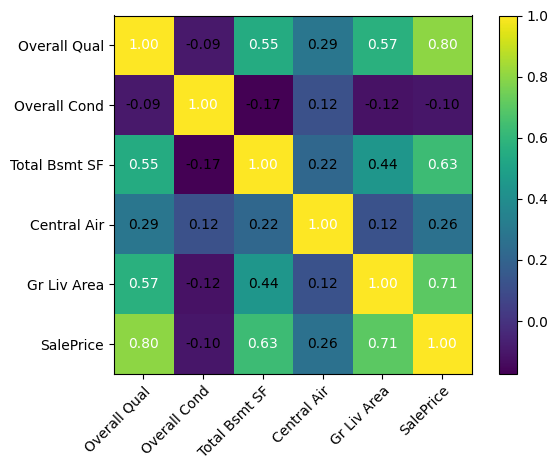

In [12]:
# 创建相关性矩阵来对特征之间的关系进行量化.
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

#### 实现最小二乘线性回归模型(ordinary least squares linear regression model)

在前面提到的最佳拟合直线，但怎样去衡量"最佳"？

所以，这里将采用ordinary least squares(OLS)--最小二乘法(有时候也称为线性最小二乘)来估计线性回归线的参数，即通过最小化训练样本与回归线的垂直距离(残差或误差)的平方和.

##### 使用梯度下降来求解回归参数

在前面Chapter2中，自适应线性神经元(Adaline)使用了线性激活函数。同时通过梯度优化算法来最小化损失函数$L(w)$。 在本节中，同样定义使用MSE(Mean Square error)来作为OLS的损失函数：

$$L(w,b)=\frac{1}{2n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^{2}$$

其中，$\hat{y}=\boldsymbol{W}^T\boldsymbol{x}+b$. OLS可以理解为没有阈值函数的Adaline, 因为我们预测得到是连续目标值。

In [13]:
# 使用Python实现.
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        return self.net_input(X)

In [14]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

In [15]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

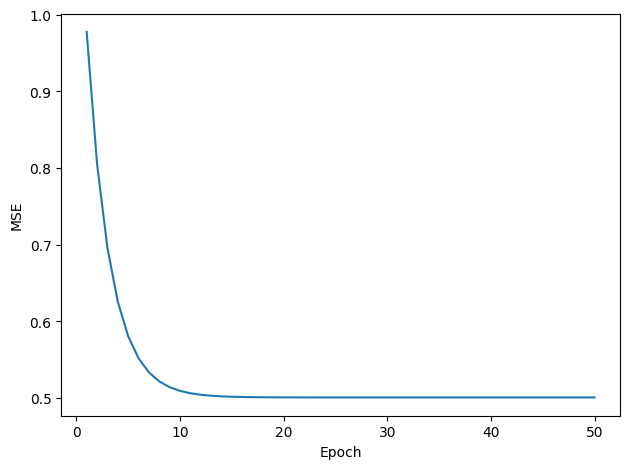

In [16]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

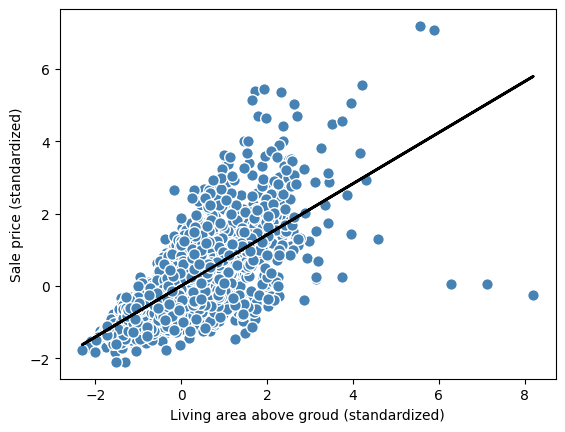

In [17]:
# 查看线性回归与训练数据的拟合程度.
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above groud (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

In [18]:
# 将预测价格缩放回以美元为单位的原始价格.
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
print(f'缩放后的预测价格： {target_std}')
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sales price: ${target_reverted.flatten()[0]:.2f}')

缩放后的预测价格： [1.39832089]
Sales price: $292507.07


In [19]:
"""
需要注意的是，如果使用标准化变量，则不必更新截距参数(例如bias unit, b), 因为y轴截距始终为0.
"""
print(f'Slope: {lr.w_[0]:.3f}')

print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


##### 使用sklearn估计回归模型的参数

In [20]:
"""
sklearn中实现的线性回归，可以在没有进行标准化的变量上依旧表现很好；
原因是它没有使用(S)GD-based进行优化.
"""
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


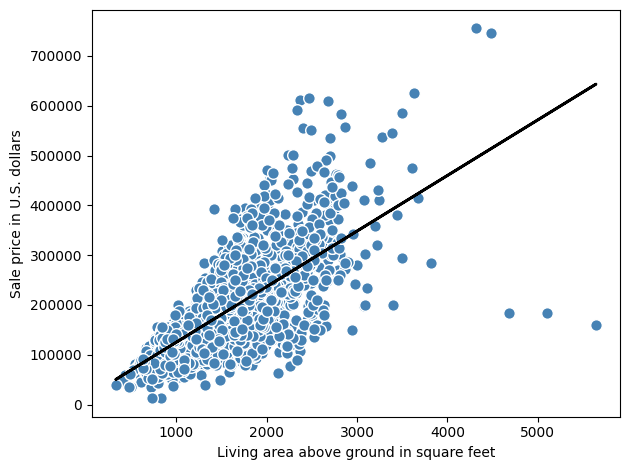

In [21]:
# 绘制回归线，与 梯度下降优化的方法进行对比.
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
plt.show()

在上图中，一方面可以看到拟合效果，另一方面也可以看出存在一定的异常值，'Living area above ground in square feet'取值在4500以后.

#### 利用RANSAC拟合一个鲁棒的回归模型

线性回归模型会受到异常值的影响，在进行异常值处理之外，可以使用Random sample Consensu(RANSAC)方法来构建稳健的回归方法，该方法在数据集的一个子集上(被称为inliers)拟合回归模型， 步骤总结如下：

* Step1: 选择随机数量的样本作为inliers(内点)并拟合模型；
* Step2: 针对拟合模型，使用余下数据来测试，并将误差在容忍范围之内的点添加到内点；
* Step3: 使用所有内点重新拟合模型；
* Step4: 估计拟合模型与内点的误差；
* Step5: 如果性能达到用户定义的某个阈值或达到固定的迭代次数，则终止算法，否则返回步骤1；

使用sklearn实现如下：

In [22]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=0.95, 
                         residual_threshold=None, 
                         random_state=123)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123)

默认情况下(residual_threshold=None)，sklearn使用**MAD**估计来选择内点阈值，其中MAD代表目标变量$y$的median absolute deviation. [Automatic Extimation of the Inlier Threshold in Robust Multiple Structures Fitting](https://link.springer.com/chapter/10.1007/978-3-642-04146-4_15)

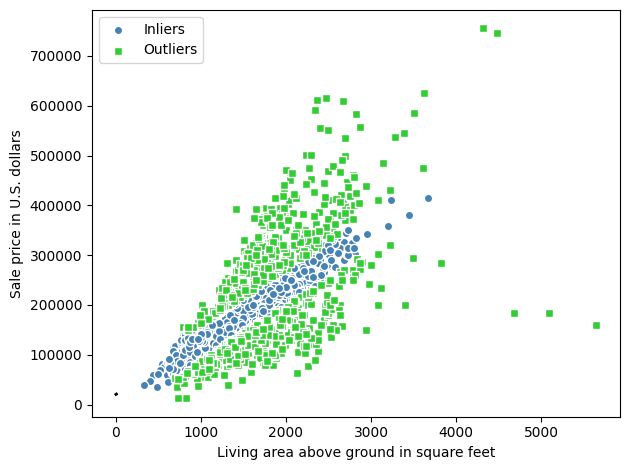

In [23]:
# 从拟合的RANSAC模型中获取内点和outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='steelblue', edgecolors='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolors='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [24]:
# 打印获取斜率和截距(slope and intercept).
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')

print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


In [25]:
# 在前面的代码中，设置了residual_threshold=None, 因此默认使用MAD计算内点和异常值的阈值.
def median_absolute_deviation(data):
    return np.median(np.abs(data-np.median(data)))

median_absolute_deviation(y)

37000.0

In [26]:
# 因此，可以设置一个较大的MAD阈值.
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=0.95, 
                         residual_threshold=65000, 
                         random_state=123)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95,
                random_state=123, residual_threshold=65000)

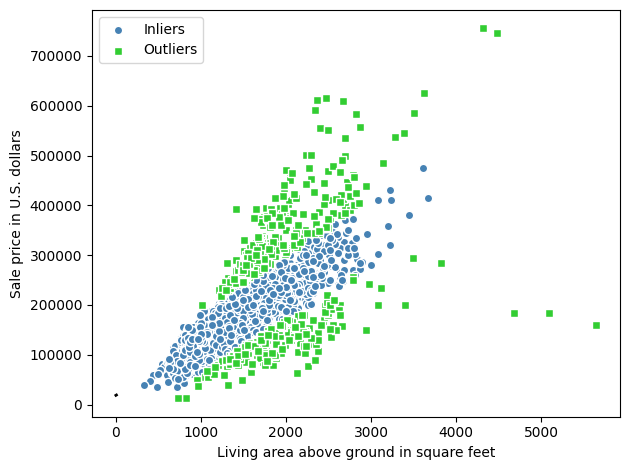

In [27]:
# 从拟合的RANSAC模型中获取内点和outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])

plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='steelblue', edgecolors='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolors='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [28]:
# 打印获取斜率和截距(slope and intercept).
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')

print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 105.631
Intercept: 18314.587


#### 线性回归的性能评估

In [29]:
# 使用所有特征重新训练拟合.
from sklearn.model_selection import train_test_split

target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

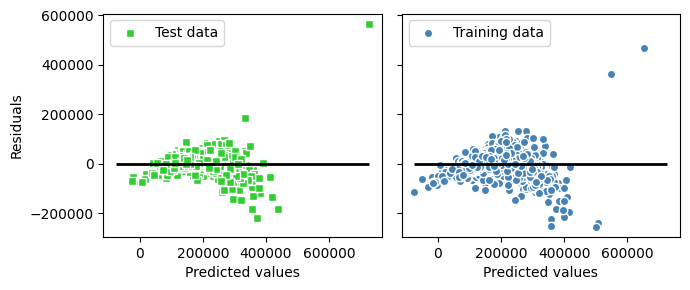

In [31]:
# 使用残差图来诊断回归模型.
"""
    残差图：残差与预测值的关系；
    可以用于检测非线性和异常值，并检查误差是否随机分布.
"""
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test, 
            c='limegreen', marker='s', 
            edgecolor='white', 
            label='Test data')

ax2.scatter(y_train_pred, y_train_pred - y_train, 
            c='steelblue', marker='o', edgecolor='white', 
            label='Training data')

ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, \
              color='black', lw=2)

plt.tight_layout()
plt.show()

对于一个好的回归模型，其误差是随机分布的，即残差分布在中心线周围.

所以上图中，残差并未体现出随机性。

In [32]:
# 计算模型的MSE.
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'MSE train: {mse_train:.2f}')

print(f'MSE test: {mse_test:.2f}')

MSE train: 1497216245.85
MSE test: 1516565821.00


从上面的结果中可以看出，训练集上的MSE小于测试集上的MSE，这表明模型出现了过拟合.

但实际上，以原始单位尺度显示误差会更加直观(上述指标为美元的平方), 所以会进一步计算RMSE或MAE.

In [33]:
# 计算模型的MAE.
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'mae_train: {mae_train:.2f}')
print(f'mae_test: {mae_test:.2f}')

mae_train: 25983.03
mae_test: 24921.29


根据MAE和MSE的结果可以看出，误差都非常大。这是应为这两个指标的解释，`依赖于数据集和特征缩放`. 示例如下：

$$|\$500K-550K|<|\$500,000-550,000|$$

所以，在回归模型中，我们会进一步计算决定系数(coefficient of determination $R^2$), 可以将其理解为MSE的标准化版本，其定义如下：

$$R^2=1-\frac{SSE}{SST}$$

在上式中，$SSE$定义为误差平方和，如下：

$$SSE=\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2$$

相应地，$SST$定义为：   目标变量的方差

$$SST=\sum_{i=1}^n(y^{(i)}-\mu_y)^2$$

所以，可以看到，$R^2$是MSE的缩放版本:

$$\begin{aligned}
R^{2}& =\quad1-\frac{\frac{1}{n}SSE}{\frac{1}{n}SST} \\
&=\quad\frac{\frac1n\sum_{i=1}^n(y^{(i)}-\hat{y}^{(i)})^2}{\frac1n\sum_{i=1}^n(y^{(i)}-\mu_y)^2} \\
&=\quad1-\frac{MSE}{Var(y)}
\end{aligned}$$

`对于训练集, $R^2$介于0和1之间，但对于测试集，$R^2$可能会出现负值。此时说明：回归模型与数据的拟合度比代表样本均值的水平线更差。`

`而且，这种情况通常发生在极端过拟合的情况下，或者是我们忘记以缩放训练集相同的方式缩放测试集。`

In [35]:
# 计算模型的决定系数.
from sklearn.metrics import r2_score

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'$R^2$ train： {train_r2:.3f}, {test_r2:.3f}')

$R^2$ train： 0.769, 0.752


#### 对回归模型进行正则化.

正则化线形回归最长用的方法是： 岭回归(ridge regression)、套索回归(least absolute shrinkage and selection operator, LASSO)和弹性网络(elastic net).

对于岭回归：
$$L(\boldsymbol{w})_{Ridge}=\sum_{i=1}^n\bigl(y^{(i)}-\hat{y}^{(i)}\bigr)^2+\lambda||\boldsymbol{w}||_2^2$$

其中，L2正则项定义如下：
$$\lambda||\boldsymbol{w}||_2^2=\lambda\sum_{j=1}^mw_j^2$$

对于套索回归：
$$L(\boldsymbol{w})_{Lasso}=\sum_{i=1}^n\bigl(y^{(i)}-\hat{y}^{(i)}\bigr)^2+\lambda||\boldsymbol{w}||_1$$

其中，L1正则项定义如下：
$$\lambda||\boldsymbol{w}||_1=2\lambda\sum_{j=1}^m\lvert w_j\rvert $$

套索回归的一个限制是：如果$m>n$,则最多只能够选择$n$个特征，其中$n$是训练样本数量。

但另一方面，套索回归可以避免饱和模型。如果训练样本数量等于特征数量，就会发生模型饱和，这是一种过度参数化的形式.

弹性网络是岭回归与套索回归之间的一种折中：
$$L(\boldsymbol{w})_{Elastic Net}=\sum_{i=1}^n\bigl(y^{(i)}-\hat{y}^{(i)}\bigr)^2+ \lambda_2||\boldsymbol{w}||_2^2 + \lambda_1||\boldsymbol{w}||_1$$


In [36]:
# 使用sklearn实现岭回归.
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

# 使用sklearn实现套索回归.
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=1.0)

# 使用sklearn实现弹性网络.
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

#### 多项式回归

对于可以拟合非线性关系的多项式回归，其定义如下：

$$y = w_1x + w_2x^2+ ... + w_dx^d+ b$$

In [37]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [38]:
# 代码示例.
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

# 训练一个简单线性回归.
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# 训练一个多项式回归.
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

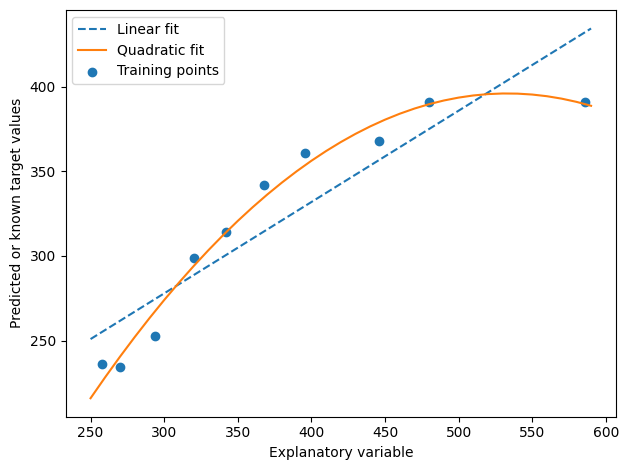

In [40]:
# 绘制结果.
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')

plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/09_12.png', dpi=300)
plt.show()

In [41]:
# 计算MSE和R^2.
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)
print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')


r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}'
      f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


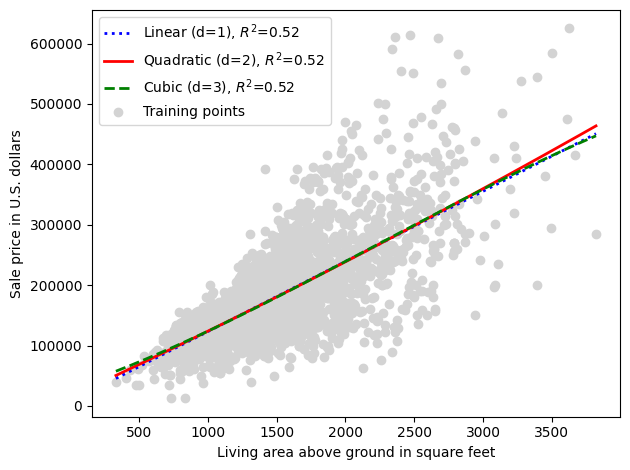

In [42]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]


regr = LinearRegression()

# create quadratic and cubic features.
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features.
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results.
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

上述效果并不明显，因为该特征与目标变量之间是线形关系.

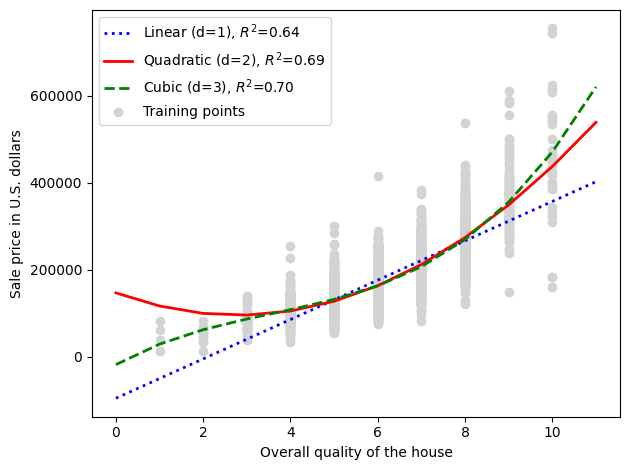

In [43]:
X = df[['Overall Qual']].values
y = df['SalePrice'].values


regr = LinearRegression()

# create quadratic and cubic features.
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features.
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results.
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green', 
         lw=2,
         linestyle='--')


plt.xlabel('Overall quality of the house')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### 使用随机森林来建模非线性关系

随机森林是多个决策树的集合，可以理解分段线性函数的总和。 (将输入空间细分为更小的区域)

In [44]:
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

当使用决策树进行分类时，将信息熵定义为不纯度的度量.对于二元分割可以定义如下：

$$IG\big(D_{p},x_{i}\big)=I\big(D_{p}\big)-\frac{N_{left}}{N_{p}}I\big(D_{left}\big)-\frac{N_{right}}{N_{p}}I\big(D_{right}\big)$$

其中，$x_{i}$时待分类的特征.$I$是不纯度函数.   在使用决策树进行回归时，需要一个适用于连续变量的不纯度度量，因此将不纯度函数定义为MSE:

$$I(t)=MSE(t)=\frac{1}{N_t}\sum_{i\in D_t}(y^{(i)}-\hat{y}_t)^2$$

其中，$N_t$为节点$t$所包含的样本总数. 同时，$\hat{y}_t$定义如下：

$$\hat{y}_t=\frac{1}{N_t}\sum_{i\in D_t}y^{(i)}$$

在决策树回归的背景下，MSE通常被称为**节点内方差(within-node variance)**, 这就是为什么分裂准则也被称为方差减少(variance reduction)的原因.

In [47]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77
R^2 train: 0.98
R^2 test: 0.85


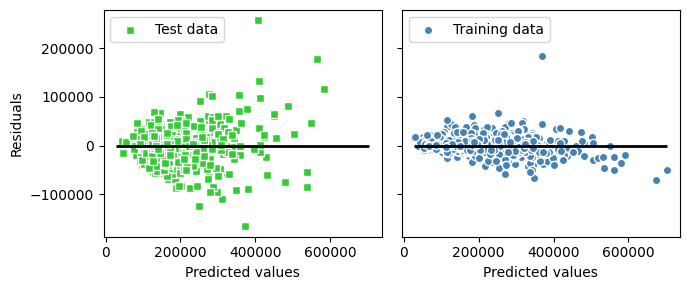

In [48]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()

plt.show()

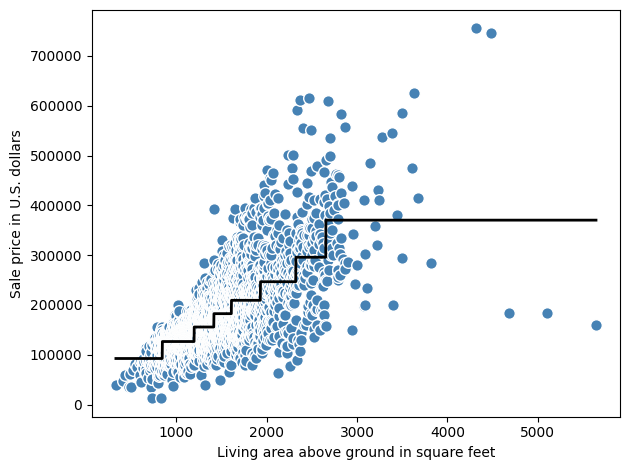

In [46]:
# 绘制决策树的回归线.
from sklearn.tree import DecisionTreeRegressor


X = df[['Gr Liv Area']].values
y = df['SalePrice'].values



tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
plt.show()